In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPyt

In [5]:
sns.color_palette(cccpalette)

In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
print_params()

M_h  = 1.16e-06, 1.00e-01
M_p  = 1.16e-06, 1.00e-01
gamma^D_p  = 8.00e-01, 6.91e+04
gamma^D_h  = 8.00e-01, 6.91e+04
R_p  = 6.62e+00, 5.72e+05
R_h  = 6.62e+00, 5.72e+05
E^O_p  = 1.16e-06, 1.00e-01
E^I_p  = 0.00e+00, 0.00e+00
E^O_h  = 0.00e+00, 0.00e+00
E^I_h  = 1.16e-06, 1.00e-01
K^ON_p  = 1.43e-01, 1.23e+04
K^IN_p  = 7.14e-01, 6.17e+04
K^OC_p  = 1.43e-01, 1.23e+04
K^IC_p  = 1.43e-01, 1.23e+04
K^ON_h  = 2.50e-01, 2.16e+04
K^IN_h  = 2.50e-01, 2.16e+04
K^OC_h  = 1.25e+00, 1.08e+05
K^IC_h  = 2.50e-01, 2.16e+04
Vmax^ON_p  = 1.40e-09, 1.21e-04
Vmax^IN_p  = 1.00e-05, 8.64e-01
Vmax^OC_p  = 9.27e-09, 8.01e-04
Vmax^IC_p  = 9.27e-05, 8.01e+00
Vmax^ON_h  = 5.00e-06, 4.32e-01
Vmax^IN_h  = 1.00e-05, 8.64e-01
Vmax^OC_h  = 3.31e-05, 2.86e+00
Vmax^IC_h  = 3.31e-09, 2.86e-04
O_p  = 6.00e-01, 5.18e+04
O_h  = 6.00e-01, 5.18e+04
epsilon  = 1.05e-06, 9.09e-02
VTmax  = 2.50e-06, 2.16e-01
KT_h  = 2.50e-01, 2.16e+04
omega  = 1.00e-02, 8.64e+02
K^S_p  = 1.43e+01, 1.23e+06
K^S_h  = 1.43e+01, 1.23e+06
E^S_p  = 1.

In [8]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [9]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_ponly_data()

In [10]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 5.97e-06, init Bp = 1.10e+00, newval = 1.10e+00
dDON/dt = 2.29e-06, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 2.55e-07, init RDON = 0.00e+00, newval = 2.55e-07
dDIN/dt = -8.52e-06, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = 3.30e-05, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 1.69e-06, init RDOC = 0.00e+00, newval = 1.69e-06
dDIC/dt = -7.42e-05, init DIC = 3.00e+03, newval = 3.00e+03
dROS/dt = 1.16e-06, init ROS = 0.00e+00, newval = 1.16e-06
dSp/dt = 1.16e-16, init Sp = 0.00e+00, newval = 1.16e-16
dSh/dt = 0.00e+00, init Sh = 0.00e+00, newval = 0.00e+00


In [11]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
limINp = 9.93e-01
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
gross_uptakeINp = 1.09e-05
gross_uptakeONp = 1.53e-09
gross_uptakeICp = 1.02e-04
gross_uptakeOCp = 1.02e-08
actual_uptakeNp = 1.09e-05
overflowNp = 0.00e+00
overflowCp = 2.96e-05
deathp = 1.27e-06
exudationOp = 1.27e-06
exudationIp = 0.00e+00
Treleasep = 1.16e-06
respirationp = 2.40e-06
dic_uptake = -1.04e-16


In [12]:
biomass_diff0_ponly(calc_dydt, var_names,init_vars)


dBp/dt  + dDON/dt + dRDON/dt + dDIN/dt = -1.1574197004461662e-16


In [13]:
init_vars

In [14]:
sol = run_solver(calc_dydt, init_vars)

In [15]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [16]:
df.head()

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,Sp,Sh,...,overflowCp,deathp,exudationOp,exudationIp,Treleasep,respirationp,dic_uptake,Bp[C],Sp[C],Sh[C]
0,1.100000,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.000000,0.000000e+00,0.0,...,0.000030,0.000001,0.000001,0.0,0.000001,0.000002,-1.040834e-16,7.287500,0.000000e+00,0.0
1,1.189430,20.034301,0.003814,99.872455,132.993689,0.025266,2999.027021,0.017335,1.733538e-12,0.0,...,0.000032,0.000001,0.000001,0.0,0.000001,0.000003,1.864876e-05,7.879972,1.148469e-11,0.0
2,1.286096,20.071390,0.007938,99.734576,133.527462,0.052586,2998.209857,0.036080,3.607987e-12,0.0,...,0.000035,0.000001,0.000001,0.0,0.000001,0.000003,3.431107e-05,8.520384,2.390291e-11,0.0
3,1.390577,20.111494,0.012396,99.585533,134.104554,0.082126,2997.504589,0.056347,5.634744e-12,0.0,...,0.000037,0.000002,0.000002,0.0,0.000001,0.000003,4.782872e-05,9.212575,3.733018e-11,0.0
4,1.503500,20.154854,0.017217,99.424429,134.728457,0.114066,2996.877388,0.078261,7.826120e-12,0.0,...,0.000040,0.000002,0.000002,0.0,0.000002,0.000003,5.985006e-05,9.960686,5.184804e-11,0.0


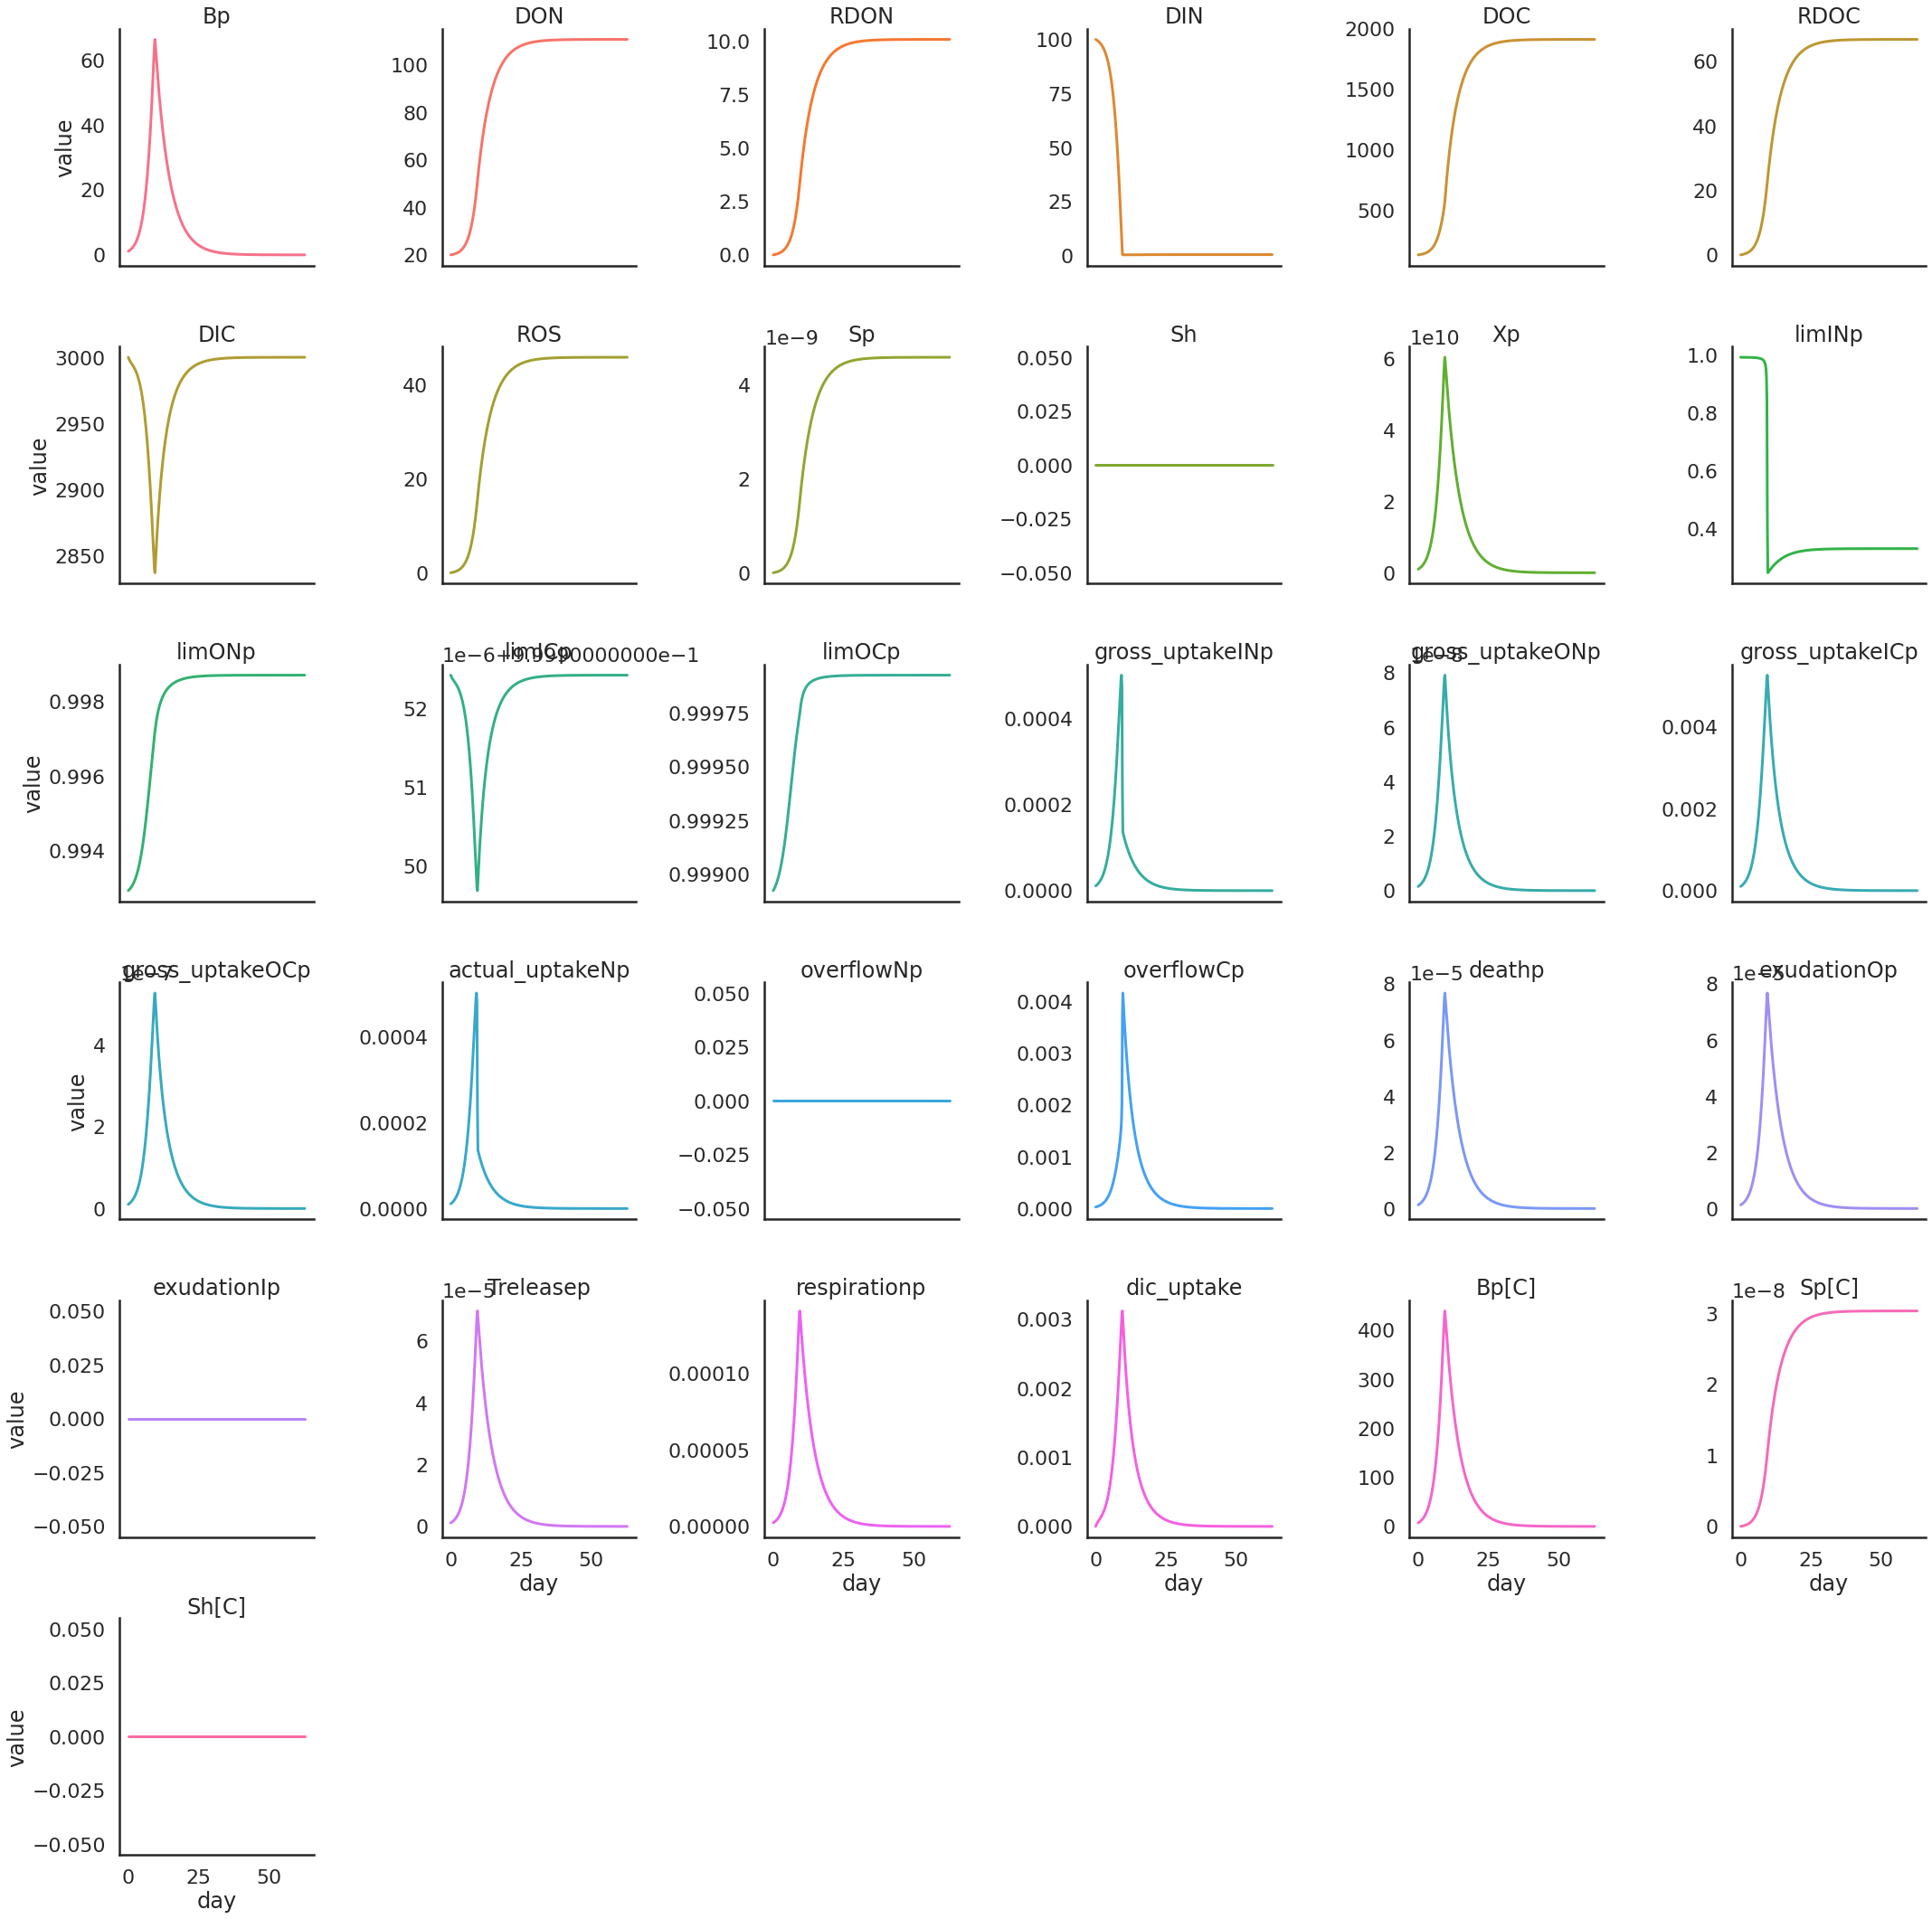

In [17]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [18]:
refdf.columns

Index(['Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312',
       'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]', 'Bh[C]',
       'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

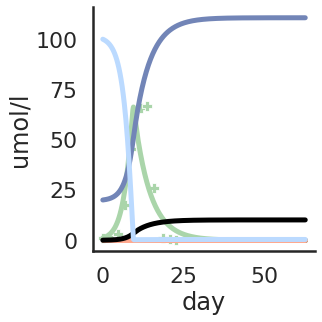

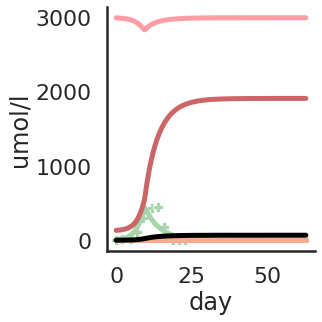

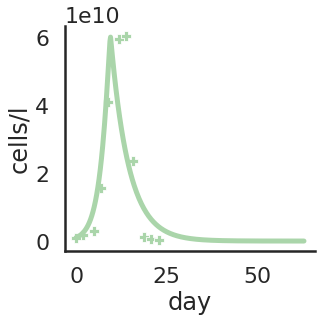

In [25]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')


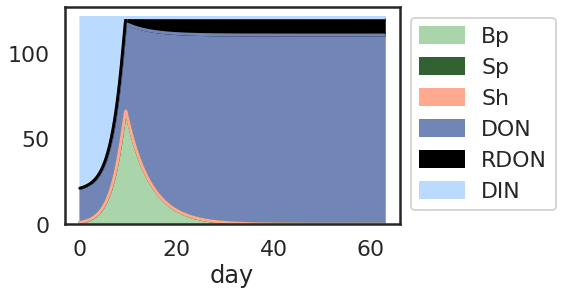

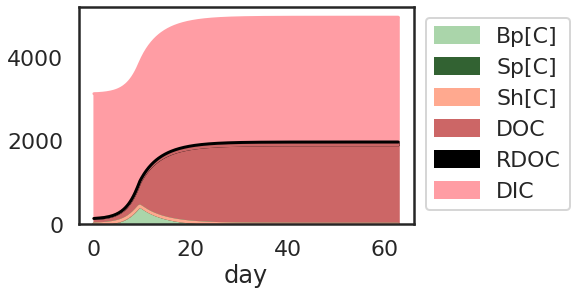

In [20]:
from matplotlib.colors import LinearSegmentedColormap
df[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


<AxesSubplot:xlabel='day', ylabel='cells/l'>

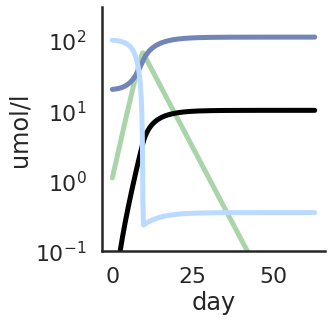

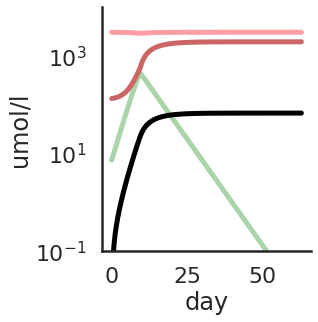

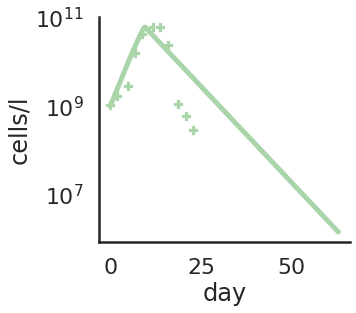

In [24]:
sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l', yscale='log')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False,color=PCOLOR_light, marker='P')


In [22]:
len(param_vals)

/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPyt

In [23]:
df.min()

Bp                 1.519953e-03
DON                2.000000e+01
RDON               0.000000e+00
DIN                2.362494e-01
DOC                1.325000e+02
RDOC               0.000000e+00
DIC                2.837340e+03
ROS                0.000000e+00
Sp                 0.000000e+00
Sh                 0.000000e+00
t                  0.000000e+00
day                0.000000e+00
Xp                 1.381775e+06
limINp             2.486827e-01
limONp             9.929130e-01
limICp             9.999497e-01
limOCp             9.989238e-01
gross_uptakeINp    3.190035e-09
gross_uptakeONp    1.343521e-12
gross_uptakeICp    8.911884e-08
gross_uptakeOCp    8.911642e-12
actual_uptakeNp    3.191378e-09
overflowNp         0.000000e+00
overflowCp         6.798487e-08
deathp             1.759205e-09
exudationOp        1.759205e-09
exudationIp        0.000000e+00
Treleasep          1.599277e-09
respirationp       3.198482e-09
dic_uptake        -1.040834e-16
Bp[C]              1.006969e-02
Sp[C]   